# ETHZ: 227-0966-00L
# Quantitative Big Imaging
# April 18, 2019

## Statistics and Reproducibility

In [1]:
%load_ext autoreload
%autoreload 2
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["figure.dpi"] = 150
plt.rcParams["font.size"] = 14
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']
plt.style.use('ggplot')
sns.set_style("whitegrid", {'axes.grid': False})

# Literature / Useful References

### Books
- Jean Claude, Morphometry with R
 - [Online](http://link.springer.com/book/10.1007%2F978-0-387-77789-4) through ETHZ
 - __Chapter 3__
 - [Buy it](http://www.amazon.com/Morphometrics-R-Use-Julien-Claude/dp/038777789X)
- John C. Russ, âThe Image Processing Handbookâ,(Boca Raton, CRC Press)
 - Available [online](http://dx.doi.org/10.1201/9780203881095) within domain ethz.ch (or proxy.ethz.ch / public VPN) 
- [Hypothesis Testing Chapter](http://www.sagepub.com/upm-data/40007_Chapter8.pdf)
- Grammar of Graphics: Leland and Wilkinson - http://www.springer.com/gp/book/9780387245447

### Videos / Podcasts
- Google/Stanford Statistics Intro
 - https://www.youtube.com/watch?v=YFC2KUmEebc
- MCB 140 P-value lecture at UC Berkeley (Audio)
 - https://itunes.apple.com/us/itunes-u/mcb-140-fall-2007-general/id461120088?mt=10
- Correlation and Causation (Video)
 - https://www.youtube.com/watch?v=YFC2KUmEebc
- Last Week Tonight: Scientific Studies
 - https://www.youtube.com/watch?v=0Rnq1NpHdmw
- Credibility Crisis 
 - https://www.datacamp.com/community/podcast/credibility-crisis-in-data-science

### Slides
- How to solve NLP problems
 - https://twitter.com/sleepinyourhat/status/1105946169165955073?s=20
- Data Visualization
 - https://socviz.co/lookatdata.html
- P-Values with Puppies
 - https://hackernoon.com/explaining-p-values-with-puppies-af63d68005d0

### Model Evaluation

- [Julia Evans - Recalling with Precision](https://www.youtube.com/watch?v=ryZL4XNUmwo)
- [Stripe's Next Top Model](https://github.com/stripe/topmodel)

### Iris Dataset

- The Iris dataset was used in Fisher's classic 1936 paper, The Use of Multiple Measurements in Taxonomic Problems: http://rcs.chemometrics.ru/Tutorials/classification/Fisher.pdf

### Papers / Sites
- [Matlab Unit Testing Documentation](http://www.mathworks.ch/ch/help/matlab/matlab-unit-test-framework.html
)
- [Databases Introduction](http://swcarpentry.github.io/sql-novice-survey/)
- [Visualizing Genomic Data](http://circos.ca/documentation/course/visualizing-genomic-data.pdf) (General Visualization Techniques)
- [NIMRod Parameter Studies](http://www.messagelab.monash.edu.au/nimrod)

- M.E. Wolak, D.J. Fairbairn, Y.R. Paulsen (2012) Guidelines for Estimating Repeatability. Methods in Ecology and Evolution 3(1):129-137.
- David J.C. MacKay, Bayesian Interpolartion (1991) [http://citeseer.ist.psu.edu/viewdoc/summary?doi=10.1.1.27.9072]

# Previously on QBI ...

- Image Enhancment 
 - Highlighting the contrast of interest in images
 - Minimizing Noise
- Understanding image histograms
- Automatic Methods
- Component Labeling
- Single Shape Analysis
- Complicated Shapes
- Dynamic Experiments

# Quantitative "Big" Imaging


The course has covered imaging enough and there have been a few quantitative metrics, but "big" has not really entered.

What does __big__ mean?

- Not just / even large
- it means being ready for _big data_
- volume, velocity, variety (3 V's)
- scalable, fast, easy to customize


So what is "big" imaging

#### doing analyses in a disciplined manner

 - fixed steps
 - easy to regenerate results
 - no _magic_
 
#### having everything automated

 - 100 samples is as easy as 1 sample
 
#### being able to adapt and reuse analyses

 - one really well working script and modify parameters
 - different types of cells
 - different regions

# Objectives

1. Scientific Studies all try to get to a single number
 - Make sure this number is describing the structure well (what we have covered before)
 - Making sure the number is meaningful (__today!__)
1. How do we compare the number from different samples and groups?
 - Within a sample or same type of samples
 - Between samples
1. How do we compare different processing steps like filter choice, minimum volume, resolution, etc?
1. How do we evaluate our parameter selection?
1. How can we ensure our techniques do what they are supposed to do?
1. How can we visualize so much data? Are there rules?

# Outline

- Motivation (Why and How?)
- Scientific Goals
- Reproducibility
- Predicting and Validating
- Statistical metrics and results
- Parameterization
 - Parameter sweep
 - Sensitivity analysis
- Unit Testing
- Visualization

# What do we start with?

Going back to our original cell image

1. We have been able to get rid of the noise in the image and find all the cells (lecture 2-4)
1. We have analyzed the shape of the cells using the shape tensor (lecture 5)
1. We even separated cells joined together using Watershed (lecture 6)
1. We have created even more metrics characterizing the distribution (lecture 7)

We have at least a few samples (or different regions), large number of metrics and an almost as large number of parameters to _tune_

### How do we do something meaningful with it?

# Correlation and Causation


One of the most repeated criticisms of scientific work is that correlation and causation are confused. 

1. Correlation 
 - means a statistical relationship
 - very easy to show (single calculation)
2. Causation 
 - implies there is a mechanism between A and B
 - very difficult to show (impossible to prove)

# Controlled and Observational

There are two broad classes of data and scientific studies. 

### Observational

 - Exploring large datasets looking for trends
 - Population is random
 - Not always hypothesis driven
 - Rarely leads to causation

We examined 100 people and the ones with blue eyes were on average 10cm taller

In 100 cake samples, we found a 0.9 correlation between cooking time and bubble size

### Controlled

 - Most scientific studies fall into this category
 - Specifics of the groups are controlled
 - Can lead to causation

We examined 50 mice with gene XYZ off and 50 gene XYZ on and as the foot size increased by 10%

We increased the temperature and the number of pores in the metal increased by 10%
 

# Simple Model: Magic / Weighted Coin



Since most of the experiments in science are usually specific, noisy, and often very complicated and are not usually good teaching examples

- Magic / Biased Coin
 - You buy a _magic_ coin at a shop
 - How many times do you need to flip it to _prove_ it is not fair?
 - If I flip it 10 times and another person flips it 10 times, is that the same as 20 flips?
 - If I flip it 10 times and then multiple the results by 10 is that the same as 100 flips?
 - If I buy 10 coins and want to know which ones are fair what do I do?
 

# Simple Model: Magic / Weighted Coin


1. Each coin represents a stochastic variable $\mathcal{X}$ and each flip represents an observation $\mathcal{X}_i$.
1. The act of performing a coin flip $\mathcal{F}$ is an observation $\mathcal{X}_i = \mathcal{F}(\mathcal{X})$

We normally assume

1. A _fair_ coin has an expected value of $E(\mathcal{X})=0.5 \rightarrow$ 50% Heads, 50% Tails
1. An _unbiased_ flip(er) means 
 - each flip is independent of the others 

$$ P(\mathcal{F}_1(\mathcal{X})*\mathcal{F}_2(\mathcal{X}))= P(\mathcal{F}_1(\mathcal{X}))*P(\mathcal{F}_2(\mathcal{X}))$$

 - the expected value of the flip is the same as that of the coin
 
$$ E(\prod_{i=0}^\infty \mathcal{F}_i(\mathcal{X})) = E(\mathcal{X}) $$

# Simple Model to Reality


### Coin Flip

1. Each flip gives us a small piece of information about the flipper and the coin
1.  More flips provides more information
 - Random / Stochastic variations in coin and flipper cancel out
 - Systematic variations accumulate



### Real Experiment

1. Each measurement tells us about our sample, out instrument, and our analysis
2. More measurements provide more information
 - Random / Stochastic variations in sample, instrument, and analysis cancel out
 - _Normally_ the analysis has very little to no stochastic variation
 - Systematic variations accumulate

# Iris: A more complicated model


Coin flips are very simple and probably difficult to match to another experiment. A very popular dataset for learning about such values beyond 'coin-flips' is called the Iris dataset which covers a number of measurements from different plants and the corresponding species.

In [2]:
%matplotlib inline
from sklearn.datasets import load_iris
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data = load_iris()
iris_df = pd.DataFrame(data['data'], columns=data['feature_names'])
iris_df['target'] = data['target_names'][data['target']]
iris_df.sample(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
30,4.8,3.1,1.6,0.2,setosa
108,6.7,2.5,5.8,1.8,virginica
42,4.4,3.2,1.3,0.2,setosa


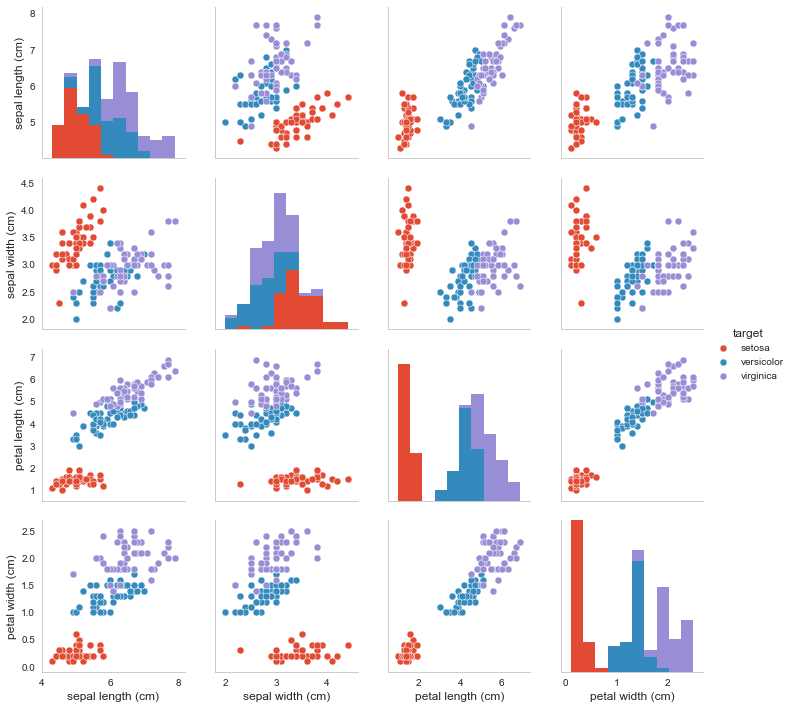

In [3]:
sns.pairplot(iris_df, hue='target')

# Reproducibility


A very broad topic with plenty of sub-areas and deeper meanings. We mean two things by reproducibility

### Analysis

The process of going from images to numbers is detailed in a clear manner that _anyone_, _anywhere_ could follow and get the exact (within some tolerance) same numbers from your samples

 - No platform dependence
 - No proprietary or "in house" algorithms
 - No manual _clicking_, _tweaking_, or _copying_
 - One script to go from image to result
 


### Measurement

Everything for analysis + taking a measurement several times (noise and exact alignment vary each time) does not change the statistics _significantly_

- No sensitivity to mounting or rotation
- No sensitivity to noise
- No dependence on exact illumination

# Reproducible Analysis


The basis for reproducible scripts and analysis are scripts and macros. Since we will need to perform the same analysis many times to understand how reproducible it is.

```bash
IMAGEFILE=$1
THRESHOLD=130
matlab -r "inImage=$IMAGEFILE; threshImage=inImage>$THRESHOLD; analysisScript;"
```
- __or__ 
```java -jar ij.jar -macro TestMacro.ijm blobs.tif```
- __or__
```Rscript -e "library(plyr);..."```

# Comparing Groups: Intraclass Correlation Coefficient


The intraclass correlation coefficient basically looking at how similar objects within a group are compared to between groups

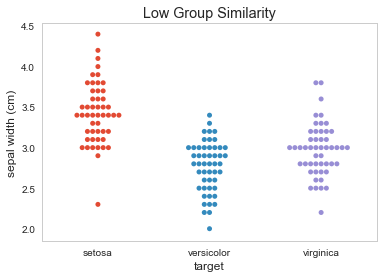

In [4]:
g = sns.swarmplot(data=iris_df, 
               x='target', 
               y='sepal width (cm)')
g.set_title('Low Group Similarity');

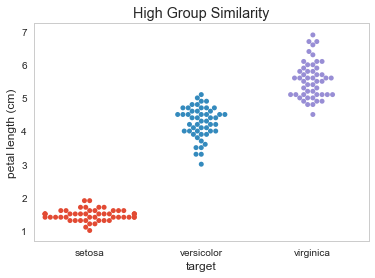

In [5]:
g = sns.swarmplot(data=iris_df, 
               x='target', 
               y='petal length (cm)')
g.set_title('High Group Similarity');

# Intraclass Correlation Coefficient Definition

$$ ICC = \frac{S_A^2}{S_A^2+S_W^2} $$

where 
- $S_A^2$ is the variance among groups or classes
 - Estimate with the standard deviations of the mean values for each group 
- $S_W^2$ is the variance within groups or classes.
 - Estimate with the average of standard deviations for each group
 
- 1 means 100% of the variance is between classes
- 0 means 0% of the variance is between classes

# Intraclass Correlation Coefficient: Values


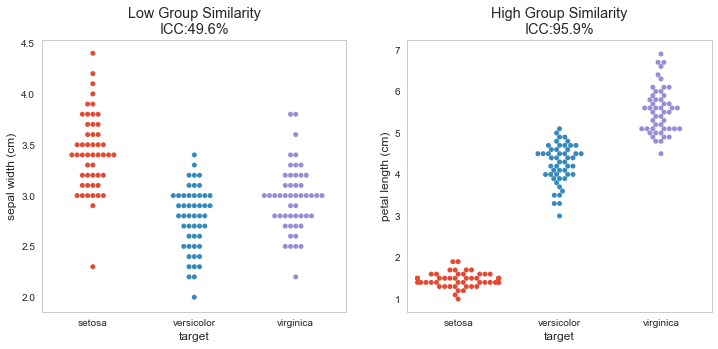

In [6]:
def icc_calc(value_name, group_name, data_df):
    data_agg = data_df.groupby(group_name).agg({value_name: ['mean', 'var']}).reset_index()
    data_agg.columns = data_agg.columns.get_level_values(1)
    S_w = data_agg['var'].mean()
    S_a = data_agg['mean'].var()
    return S_a/(S_a+S_w)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
sns.swarmplot(data=iris_df, 
               x='target', 
               y='sepal width (cm)',
             ax=ax1)
ax1.set_title('Low Group Similarity\nICC:{:2.1%}'.format(
    icc_calc('sepal width (cm)', 'target', iris_df)));

sns.swarmplot(data=iris_df, 
               x='target', 
               y='petal length (cm)',
             ax=ax2)
ax2.set_title('High Group Similarity\nICC:{:2.1%}'.format(
    icc_calc('petal length (cm)', 'target', iris_df)));

# Comparing Groups: Tests


Once the reproducibility has been measured, it is possible to compare groups. The idea is to make a test to assess the likelihood that two groups are the same given the data

1. List assumptions
1. Establish a null hypothesis
 - Usually both groups are the same
1. Calculate the probability of the observations given the truth of the null hypothesis
 - Requires knowledge of probability distribution of the data
 - Modeling can be exceptionally complicated
 


### Loaded Coin
We have 1 coin from a magic shop
- our assumptions are
 - we flip and observe flips of coins accurately and independently
 - the coin is invariant and always has the same expected value
- our null hypothesis is the coin is unbiased $E(\mathcal{X})=0.5$
- we can calculate the likelihood of a given observation given the number of flips (p-value)

```{r, results='asis'}
n.flips<-c(1,5,10)
cf.table<-data.frame(No.Flips=n.flips,PAH=paste(round(1000*0.5^n.flips)/10,"%"))
names(cf.table)<-c("Number of Flips","Probability of All Heads Given Null Hypothesis (p-value)")
kable(cf.table)
```

How good is good enough?

# Comparing Groups: Student's T Distribution

Since we do not usually know our distribution very well _or_ have enough samples to create a sufficient probability model

### [Student T Distribution](http://en.wikipedia.org/wiki/Student's_t-distribution)
We assume the distribution of our stochastic variable is normal (Gaussian) and the t-distribution provides an estimate for the mean of the underlying distribution based on few observations.

- We estimate the likelihood of our observed values assuming they are coming from random observations of a normal process



### Student T-Test

Incorporates this distribution and provides an easy method for assessing the likelihood that the two given set of observations are coming from the same underlying process (null hypothesis)

- Assume unbiased observations
- Assume normal distribution

# Multiple Testing Bias


Back to the magic coin, let's assume we are trying to publish a paper, we heard a p-value of < 0.05 (5%) was good enough. That means if we get 5 heads we are good!

In [22]:
import pandas as pd
from scipy.stats import ttest_ind
from IPython.display import display
all_heads_df = pd.DataFrame({'n_flips': [1, 4, 5]})
all_heads_df['Probability of # Heads'] = all_heads_df['n_flips'].map(
    lambda x: '{:2.1%}'.format(0.5**x))
display(all_heads_df)
friends_heads_df = pd.DataFrame({'n_friends': [1, 10, 20, 40, 80]})
friends_heads_df['Probability of 5 Heads'] = friends_heads_df['n_friends'].map(
    lambda n_friends: '{:2.1%}'.format((1-(1-0.5**5)**n_friends)))
display(friends_heads_df)

,n_flips,Probability of # Heads
0,1,50.0%
1,4,6.2%
2,5,3.1%


,n_friends,Probability of 5 Heads
0,1,3.1%
1,10,27.2%
2,20,47.0%
3,40,71.9%
4,80,92.1%


Clearly this is not the case, otherwise we could keep flipping coins or ask all of our friends to flip until we got 5 heads and publish

The p-value is only meaningful when the experiment matches what we did. 
- We didn't say the chance of getting 5 heads ever was < 5%
- We said if we have exactly 5 observations and all of them are heads the likelihood that a fair coin produced that result is <5%

Many [methods](http://en.wikipedia.org/wiki/Multiple_comparisons_problem) to correct, most just involve scaling $p$. The likelihood of a sequence of 5 heads in a row if you perform 10 flips is 5x higher.

# Multiple Testing Bias: Experiments


This is very bad news for us. We have the ability to quantify all sorts of interesting metrics 
- cell distance to other cells
- cell oblateness
- cell distribution oblateness

So lets throw them all into a magical statistics algorithm and push the __publish__ button



With our p value of less than 0.05 and a study with 10 samples in each group, how does increasing the number of variables affect our result

```{r simcode}
make.random.data<-function(n.groups=2,n.samples=10,n.vars=1,rand.fun=runif,group.off.fun=function(grp.id) 0) {
  ldply(1:n.groups,function(c.group) {
    data.frame(group=c.group,
               do.call(cbind,llply(1:n.vars,function(c.var) group.off.fun(c.group)+rand.fun(n.samples)))
               )
  })
}
# only works for two groups
all.t.test<-function(in.data) {
  group1<-subset(in.data,group==1)[,-1,drop=F]
  group2<-subset(in.data,group==2)[,-1,drop=F]
  ldply(1:ncol(group1),function(var.id) {
    tres<-t.test(group1[,var.id],group2[,var.id])
    data.frame(var.col=var.id,
              p.val=tres$p.value,
               method=tres$method,
              var.count=ncol(group1),
              sample.count=nrow(in.data))
    }
  )
}
# run the entire analysis several times to get an average
test.random.data<-function(n.test=10,...) {
  ldply(1:n.test,function(c.test) cbind(test.num=c.test,all.t.test(make.random.data(...))))
}
```
```{r rand.sim}
var.range<-round(seq(1,60,length.out=15))
test.cnt<-80
sim.data<-ldply(var.range,function(n.vars) test.random.data(test.cnt,n.vars=n.vars))
sig.likelihood<-ddply(sim.data,.(var.count),function(c.tests) {
  data.frame(sig.vars=nrow(subset(c.tests,p.val<=0.05))/length(unique(c.tests$test.num)))
})
```
```{r, fig.height=5}

ggplot(sig.likelihood,
       aes(x=var.count,y=sig.vars))+
  geom_point()+geom_line()+
  labs(x="Number of Variables in Study",y="Number of Significant \n (P<0.05) Findings")+
  theme_bw(20)
```

# Multiple Testing Bias: Correction

Using the simple correction factor (number of tests performed), we can make the significant findings constant again
```{r, fig.height=5}

sig.likelihood.corr<-ddply(sim.data,.(var.count),function(c.tests) {
  data.frame(sig.vars=nrow(subset(c.tests,p.val<=0.05/var.count))/length(unique(c.tests$test.num)))
})
ggplot(sig.likelihood.corr,
       aes(x=var.count,y=sig.vars))+
  geom_point()+geom_line(aes(color="Corrected"))+
  geom_point(data=sig.likelihood)+
  geom_line(data=sig.likelihood,aes(color="Non-Corrected"))+
  geom_hline(yintercept=0.05,color="green",alpha=0.4,size=2)+
  scale_y_sqrt()+
  labs(x="Number of Variables in Study",y="Number of Significant \n (P<0.05) Findings")+
  theme_bw(20)
```


So no harm done there we just add this correction factor right?
Well what if we have exactly one variable with shift of 1.0 standard deviations from the other.

```{r rand.sim.diff}
var.range<-round(seq(10,60,length.out=10))
test.cnt<-100
one.diff.sample<-function(grp.id) ifelse(grp.id==2,.10,0)
sim.data.diff<-ldply(var.range,function(n.samples) 
  test.random.data(test.cnt,n.samples=n.samples,
                   rand.fun=function(n.cnt) rnorm(n.cnt,mean=1,sd=0.1),
                   group.off.fun=one.diff.sample))
```

```{r, fig.height=5}
ggplot(sim.data.diff,aes(x=sample.count,y=p.val))+
  geom_point()+
  geom_smooth(aes(color=" 1 Variable"))+
  geom_hline(yintercept=0.05,color="green",alpha=0.4,size=2)+
  labs(x="Number of Samples in Study",y="P-Value for a 10% Difference")+
  theme_bw(20)
```

# Multiple Testing Bias: Sample Size

```{r rand.sim.mcsample}
var.range<-c(1,5,10,20,100) # variable count
sim.data.psig<-ldply(var.range,function(c.vcnt) {
  cbind(var.count=c.vcnt,ddply(sim.data.diff,.(sample.count),function(c.sample) 
    data.frame(prob.sig=nrow(subset(c.sample,p.val<=0.05/c.vcnt))/nrow(c.sample))
  ))
})

```
```{r, fig.height=9,fig.width=12}
ggplot(sim.data.psig,aes(x=sample.count,y=100*prob.sig))+
  geom_line(aes(color=as.factor(var.count)),size=2)+
  ylim(0,100)+
  labs(x="Number of Samples in Study",y="Probability of Finding\n Significant Variable (%)",color="Variables")+
  theme_bw(20)

```

# Predicting and Validating


![Validation Graphic](http://1.bp.blogspot.com/-ME24ePzpzIM/UQLWTwurfXI/AAAAAAAAANw/W3EETIroA80/s1600/drop_shadows_background.png)
- Borrowed from http://peekaboo-vision.blogspot.ch/2013/01/machine-learning-cheat-sheet-for-scikit.html

### Main Categories

- Classification
- Regression
- Clustering
- Dimensionality Reduction

# Overview


Basically all of these are ultimately functions which map inputs to outputs. 

The input could be 

- an image
- a point
- a feature vector
- or a multidimensional tensor

The output is

- a value (regression)
- a classification (classification)
- a group (clustering)
- a vector / matrix / tensor with _fewer_ degrees of input / less noise as the original data (dimensionality reduction)

### Overfitting

The most serious problem with machine learning and such approachs is overfitting your model to your data. Particularly as models get increasingly complex (random forest, neural networks, deep learning, ...), it becomes more and more difficult to apply common sense or even understand exactly what a model is doing and why a given answer is produced. 

```python
magic_classifier = {}
# training
magic_classifier['Dog'] = 'Animal'
magic_classifier['Bob'] = 'Person'
magic_classifier['Fish'] = 'Animal'
```

Now use this classifier, on the training data it works really well

```python
magic_classifier['Dog'] == 'Animal' # true, 1/1 so far!
magic_classifier['Bob'] == 'Person' # true, 2/2 still perfect!
magic_classifier['Fish'] == 'Animal' # true, 3/3, wow!
```

On new data it doesn't work at all, it doesn't even execute.

```python
magic_classifier['Octopus'] == 'Animal' # exception?! but it was working so well
magic_classifier['Dan'] == 'Person' # exception?! 
```

The above example appeared to be a perfect trainer for mapping names to animals or people, but it just memorized the inputs and reproduced them at the output and so didn't actually learn anything, it just copied.

# Validation


Relevant for each of the categories, but applied in a slightly different way depending on the group. The idea is two divide the dataset into groups called training and validation or ideally training, validation, and testing. The analysis is then 

- developed on __training__
- iteratively validated on __validation__
- ultimately tested on __testing__

# Concrete Example: Classifying Flowers


Here we return to the iris data set and try to automatically classify flowers

```{r, results = 'asis'}
iris  %>% sample_n(5) %>% kable(,digits=2)
```

# Dividing the data

We first decide on a split, in this case 60%, 30%, 10% for training, validation, and testing and randomly divide up the data.

```{r, echo=T, results='asis'}
div.iris<-iris %>%
  mutate(
    # generate a random number uniformally between 0 and 1
    rand_value = runif(nrow(iris)),
    # divide the data based on how high this number is into different groups
    data_div = ifelse(rand_value<0.6,"Training",
                      ifelse(rand_value<0.9,"Validation",
                             "Testing")
                      )
  ) %>% select(-rand_value) # we don't need this anymore
div.iris %>% sample_n(4) %>% kable(digits=2)
```

Here are two relevant variables plotted against each other

```{r}
ggplot(div.iris,aes(Sepal.Length,Sepal.Width))+
  geom_point(aes(shape=data_div,color=Species),size=2)+
  labs(shape="Type")+
  facet_grid(~data_div)+
  coord_equal()+
  theme_bw(10)
```

# Using a simple decision tree

Making a decision tree can be done by providing the output (```class```) as a function of the input, in this case just a combination of _x1_ and _y1_ (```~x1+y1```). From this a 
```{r, echo=T}
library(rpart)
library(rpart.plot)
training.data <- div.iris %>% subset(data_div == "Training")
dec.tree<-rpart(Species~Sepal.Length+Sepal.Width,data=iris)
```

A tree can be visualized graphically as a trunk (the top most node) dividing progressively into smaller subnodes

```{r}
prp(dec.tree)
```

or as a list of rules to apply
```{r, results='markdown'}
print(dec.tree)
```

Overlaying with the prediction data looks good

```{r}
match_range<-function(ivec,n_length=10) seq(from=min(ivec),to=max(ivec),length=n_length)
pred.map<-expand.grid(Sepal.Length = match_range(training.data$Sepal.Length), 
                      Sepal.Width = match_range(training.data$Sepal.Width)) 
pred.map$pred_class<-predict(dec.tree,pred.map,type="class")

training.data %>% 
  mutate(pred_class=predict(dec.tree,training.data,type="class"),
         class_result=ifelse(as.character(pred_class)==as.character(Species),"Correct","Incorrect")
         )->training.data
ggplot(pred.map,aes(Sepal.Length,Sepal.Width))+
  geom_tile(aes(fill=pred_class),alpha=0.5)+
  geom_point(data=training.data,aes(color=Species,size=class_result))+
  labs(fill="Predicted",size = "Incorrectly\nLabeled")+
  theme_bw(20)
```

It struggles more with the validation data since it has never seen it before and it's not quite the same as the training

```{r}
valid.data<-div.iris %>% subset(data_div == "Validation")
valid.data %>%
  mutate(pred_class=predict(dec.tree,valid.data,type="class"),
         class_result=ifelse(as.character(pred_class)==as.character(Species),"Correct","Incorrect")
         )->valid.data

ggplot(pred.map,aes(Sepal.Length,Sepal.Width))+
  geom_tile(aes(fill=pred_class),alpha=0.5)+
  geom_point(data=valid.data,aes(color=Species,size=class_result))+
  labs(fill="Predicted",size = "Incorrectly\nLabeled")+
  theme_bw(20)
```

The test data (__normally we would not look at it at all right now and wait until the very end__) looks even worse and an even smaller fraction is correctly matched.

```{r}
valid.data<-div.iris %>% subset(data_div == "Testing")
valid.data %>%
  mutate(pred_class=predict(dec.tree,valid.data,type="class"),
         class_result=ifelse(as.character(pred_class)==as.character(Species),"Correct","Incorrect")
         )->valid.data

ggplot(pred.map,aes(Sepal.Length,Sepal.Width))+
  geom_tile(aes(fill=pred_class),alpha=0.5)+
  geom_point(data=valid.data,aes(color=Species,size=class_result))+
  labs(fill="Predicted",size = "Incorrectly\nLabeled")+
  theme_bw(20)
```

# Tricky Concrete Example: Classification


Taking a list of points (feature vectors) where each has an $x1$ and a $y1$ coordinate and a classification (_Happy_ or _Sad_), we can show the data as a table

```{r, results = 'asis'}
spiral.pts <- expand.grid(x = -50:50, y = -50:50) %>% 
  subset((x==0) | (y==0)) %>%
  mutate(
    r = sqrt(x^2+y^2),
    th = r/60*2*pi,
    x1 = cos(th)*x-sin(th)*y,
    y1 = sin(th)*x+cos(th)*y,
    class = ifelse(x==0,"Happy","Sad")
  ) %>% 
  select(x1,y1,class)
kable(spiral.pts  %>% sample_n(5),digits=2)
```

Or graphically

```{r}
ggplot(spiral.pts,aes(x1,y1,color=class))+
  geom_point()+
  theme_bw(20)
```

You can play around with neural networks and this data set at [TensorFlow Playground](playground.tensorflow.org)

# Dividing the data

We first decide on a split, in this case 60%, 30%, 10% for training, validation, and testing and randomly divide up the data.

```{r, echo=T, results='asis'}
div.spiral.pts<-spiral.pts %>%
  mutate(
    # generate a random number uniformally between 0 and 1
    rand_value = runif(nrow(spiral.pts)),
    # divide the data based on how high this number is into different groups
    data_div = ifelse(rand_value<0.6,"Training",
                      ifelse(rand_value<0.9,"Validation",
                             "Testing")
                      )
  ) %>% select(-rand_value) # we don't need this anymore
div.spiral.pts %>% sample_n(4) %>% kable(digits=2)
```

```{r}
ggplot(div.spiral.pts,aes(x1,y1))+
  geom_point(aes(shape=data_div,color=class),size=2)+
  labs(shape="Type")+
  facet_wrap(~data_div)+
  coord_equal()+
  theme_bw(20)
```

# Using a simple decision tree

Making a decision tree can be done by providing the output (```class```) as a function of the input, in this case just a combination of _x1_ and _y1_ (```~x1+y1```). From this a 
```{r, echo=T}
library(rpart)
library(rpart.plot)
training.data <- div.spiral.pts %>% subset(data_div == "Training")
dec.tree<-rpart(class~x1+y1,data=training.data)
```

A tree can be visualized graphically as a trunk (the top most node) dividing progressively into smaller subnodes

```{r}
prp(dec.tree)
```

or as a list of rules to apply
```{r, results='markdown'}
print(dec.tree)
```

Overlaying with the prediction data looks good

```{r}
pred.map<-expand.grid(x1 = -50:50, y1 = -50:50) 
pred.map$pred_class<-ifelse(predict(dec.tree,pred.map)[,1]>0.5,"Happy","Sad")

training.data$pred_class<-ifelse(predict(dec.tree,training.data)[,1]>0.5,"Happy","Sad")
ggplot(pred.map,aes(x1,y1))+
  geom_tile(aes(fill=pred_class),alpha=0.5)+
  geom_point(data=training.data,aes(color=class,size=(pred_class!=class)))+
  labs(fill="Predicted",size = "Incorrectly\nLabeled")+
  theme_bw(20)
```

It struggles more with the validation data since it has never seen it before and it's not quite the same as the training

```{r}
valid.data<-div.spiral.pts %>% subset(data_div == "Validation")
valid.data$pred_class<-ifelse(predict(dec.tree,valid.data)[,1]>0.5,"Happy","Sad")
ggplot(pred.map,aes(x1,y1))+
  geom_tile(aes(fill=pred_class),alpha=0.5)+
  geom_point(data=valid.data,aes(color=class,size=(pred_class!=class)))+
  labs(fill="Predicted",size = "Incorrectly\nLabeled")+
  theme_bw(20)
```

The test data (__normally we would not look at it at all right now and wait until the very end__) looks even worse and an even smaller fraction is correctly matched.

```{r}
valid.data<-div.spiral.pts %>% subset(data_div == "Testing")
valid.data$pred_class<-ifelse(predict(dec.tree,valid.data)[,1]>0.5,"Happy","Sad")
ggplot(pred.map,aes(x1,y1))+
  geom_tile(aes(fill=pred_class),alpha=0.5)+
  geom_point(data=valid.data,aes(color=class,size=(pred_class!=class)))+
  labs(fill="Predicted",size = "Incorrectly\nLabeled")+
  theme_bw(20)
```

We can choose to make more complicated trees by changing the function to something more detailed like

$$ class = x1+y1+x1^2+y1^2+\sin(x1/5)+\sin(y1/5) $$

```{r, echo=T}
dec.tree<-rpart(class~x1+y1+x1^2+y1^2+sin(x1/5)+sin(y1/5),data=training.data)
prp(dec.tree)
```

```{r}
pred.map$pred_class<-ifelse(predict(dec.tree,pred.map)[,1]>0.5,"Happy","Sad")

training.data$pred_class<-ifelse(predict(dec.tree,training.data)[,1]>0.5,"Happy","Sad")
ggplot(pred.map,aes(x1,y1))+
  geom_tile(aes(fill=pred_class),alpha=0.5)+
  geom_point(data=training.data,aes(color=class,size=(pred_class!=class)))+
  labs(fill="Predicted",size = "Incorrectly\nLabeled")+
  theme_bw(20)
```

# Parameters

```{r, show_chain_block}
library(igraph)
make.im.proc.chain<-function(root.node="Raw\nImages",filters=c(),filter.parms=c(),
                             segmentation=c(),segmentation.parms=c(),
                             analysis=c(),analysis.parms=c()) {
  node.names<-c("Raw\nImages",
                filter.parms,filters,
                segmentation.parms,segmentation,
                analysis.parms,analysis
                
                )
  
  c.mat<-matrix(0,length(node.names),length(node.names))
  colnames(c.mat)<-node.names
  rownames(c.mat)<-node.names
  
  
  for(cFilt in filters) {
    c.mat["Raw\nImages",cFilt]<-1
    for(cParm in filter.parms) c.mat[cParm,cFilt]<-1
    for(cSeg in segmentation) {
        c.mat[cFilt,cSeg]<-1
        for(cParm in segmentation.parms) c.mat[cParm,cSeg]<-1
        for(cAnal in analysis) {
          c.mat[cSeg,cAnal]<-1
          for(cParm in analysis.parms) c.mat[cParm,cAnal]<-1
        }
      }
    }
  
  
  g<-graph.adjacency(c.mat,mode="directed")
  V(g)$degree <- degree(g)
  V(g)$label <- V(g)$name
  V(g)$color <- "lightblue"
  V(g)["Raw\nImages"]$color<-"lightgreen"
  for(cAnal in analysis) V(g)[cAnal]$color<-"pink"
  V(g)$size<-30
  for(cParam in c(filter.parms,segmentation.parms,analysis.parms)) {
    V(g)[cParam]$color<-"grey"
    V(g)[cParam]$size<-25
  }
  E(g)$width<-2
  g
  }
```
How does a standard image processing chain look?
```{r , fig.height=9}
g<-make.im.proc.chain(filters=c("Gaussian\nFilter"),
                      filter.parms=c("3x3\nNeighbors","0.5 Sigma"),
                      segmentation=c("Threshold"),
                      segmentation.parms=c("100"),
                      analysis=c("Shape\nAnalysis","Thickness\nAnalysis")
                      )
plot(g)#,layout=layout.circle) #, layout=layout.circle)# layout.fruchterman.reingold)# layout.kamada.kawai) 
```



- Green are the images we start with (measurements)
- Blue are processing steps
- Gray are use input parameters
- Pink are the outputs

# The Full Chain

```{r , fig.height=8,fig.width=18}
library(igraph)
g<-make.im.proc.chain(filters=c("Gaussian\nFilter","Median\nFilter","Diffusion\nFilter","No\nFilter",
                                "Laplacian\nFilter"),
                      segmentation=c("Threshold","Hysteresis\nThreshold","Automated"),
                      analysis=c("Shape\nAnalysis","Thickness\nAnalysis","Distribution\nAnalysis",
                                 "Skeleton\nAnalysis","2 Point\nCorr","Curvature")
                      )
plot(g,layout=layout.reingold.tilford) #, layout=layout.circle)# layout.fruchterman.reingold)# layout.kamada.kawai) 
```

# The Full Chain (with Parameters)

```{r , fig.height=9,fig.width=9}
g<-make.im.proc.chain(filters=c("Gaussian\nFilter","Median\nFilter","Diffusion\nFilter"),
                      filter.parms=c("3x3\nNeighbors","5x5\nNeighbors","7x7\nNeighbors",
                                     "0.5 Sigma","1.0 Sigma","1.2 Sigma"),
                      segmentation=c("Threshold","Hysteresis\nThreshold","Automated"),
                      segmentation.parms=paste(seq(90,110,length.out=3)),
                      analysis=c("Shape\nAnalysis","Thickness\nAnalysis","Distribution\nAnalysis","Skeleton\nAnalysis","2 Point\nCorr")
                      )
plot(g,layout=layout.lgl(g,maxiter=10000,root=1)) #, layout=layout.circle)# layout.fruchterman.reingold)# layout.kamada.kawai) 
```



- A __mess__, over 1080 combinations for just one sample (not even exploring a very large range of threshold values)
- To calculate this for even one sample can take days (weeks, years) 
 - 512 x 512 x 512 foam sample $\rightarrow$ 12 weeks of processing time
 - 1024 x 1024 x 1024 femur bone $\rightarrow$ 1.9 years 
- Not all samples are the same
- Once the analysis is run we have a ton of data
 - femur bone $\rightarrow$ 60 million shapes analyzed
- What do we even want? 
- How do we judge the different results?

# Qualitative vs Quantitative


Given the complexity of the tree, we need to do some pruning

### Qualitative Assessment
 - Evaluating metrics using visual feedback
 - Compare with expectations from other independent techniques or approach
 - Are there artifacts which are included in the output?
 - Do the shapes look correct?
 - Are they distributed as expected?
 - Is their orientation meaningful?
 


![Porosity](ext-figures/poros.png)

# Quantitative Metrics


With a quantitative approach, we can calculate the specific shape or distribution metrics on the sample with each parameter and establish the relationship between parameter and metric. 

### Parameter Sweep

The way we do this is usually a parameter sweep which means taking one (or more) parameters and varying them between the reasonable bounds (judged qualitatively).



```{r, load-metrics}
source('../common/shapeAnalysisProcess.R')
source('../common/commonReportFunctions.R')
# read and correct the coordinate system
thresh.fun<-function(x) {
  pth<-rev(strsplit(x,"/")[[1]])[2]
  t<-strsplit(pth,"_")[[1]][3]
  as.numeric(substring(t,2,nchar(t)))
}
readfcn<-function(x) cbind(compare.foam.corrected(x,
                                                  checkProj=F
                                                  #force.scale=0.011 # force voxel size to be 11um
                                                  ),
                           thresh=thresh.fun(x) # how to parse the sample names
                           )
# Where are the csv files located
rootDir<-"../common/data/mcastudy" 
clpor.files<-Sys.glob(paste(rootDir,"/a*/lacun_0.csv",sep="/")) # list all of the files

# Read in all of the files
all.lacun<-ldply(clpor.files,readfcn,.parallel=T)
```

```{r , fig.height=5}
 ggplot(all.lacun,aes(y=VOLUME*1e9,x=thresh))+
  geom_jitter(alpha=0.1)+geom_smooth()+
  theme_bw(24)+labs(y="Volume (um3)",x="Threshold Value",color="Threshold")+ylim(0,1000)
```

# Is it always the same?



```{r , fig.height=5}
 ggplot(subset(all.lacun,thresh %% 1000==0),aes(y=VOLUME*1e9,x=as.factor(thresh)))+
  geom_violin()+
  theme_bw(24)+labs(y="Volume (um3)",x="Threshold Value",color="Threshold")+ylim(0,1000)
```



```{r , fig.height=5}
 ggplot(all.lacun,aes(y=PCA1_Z,x=thresh))+
  geom_jitter(alpha=0.1)+geom_smooth()+
  theme_bw(24)+labs(y="Orientation",x="Threshold Value",color="Threshold")
```

# Sensitivity

Sensitivity is defined in control system theory as the change in the value of an output against the change in the input.
$$ S = \frac{|\Delta \textrm{Metric}|}{|\Delta \textrm{Parameter}|} $$

Such a strict definition is not particularly useful for image processing since a threshold has a unit of intensity and a metric might be volume which has $m^3$ so the sensitivity becomes volume per intensity. 

 

### Practical Sensitivity

A more common approach is to estimate the variation in this parameter between images or within a single image (automatic threshold methods can be useful for this) and define the sensitivity based on this variation. It is also common to normalize it with the mean value so the result is a percentage.

$$ S = \frac{max(\textrm{Metric})-min(\textrm{Metric})}{avg(\textrm{Metric})} $$

# Sensitivity: Real Measurements


In this graph it is magnitude of the slope. The steeper the slope the more the metric changes given a small change in the parameter

```{r , fig.height=5}
poresum<-function(all.data) ddply(all.data,.(thresh),function(c.sample) {
  data.frame(Count=nrow(c.sample),
             Volume=mean(c.sample$VOLUME*1e9),
             Stretch=mean(c.sample$AISO),
             Oblateness=mean(c.sample$OBLATENESS),
             #Lacuna_Density_mm=1/mean(c.sample$DENSITY_CNT),
             Length=mean(c.sample$PROJ_PCA1*1000),
             Width=mean(c.sample$PROJ_PCA2*1000),
             Height=mean(c.sample$PROJ_PCA3*1000),
             Orientation=mean(abs(c.sample$PCA1_Z)))
})
comb.summary<-cbind(poresum(all.lacun),Phase="Lacuna")
splot<-ggplot(comb.summary,aes(x=thresh))
splot+geom_line(aes(y=Count))+geom_point(aes(y=Count))+scale_y_log10()+
  theme_bw(24)+labs(y="Object Count",x="Threshold",color="Phase")
```

Comparing Different Variables we see that the best (lowest) value for the count sensitivity is the highest for the volume and anisotropy. 

```{r , fig.height=5}
calc.sens<-function(in.df) {
  data.frame(sens.cnt=100*with(in.df,(max(Count)-min(Count))/mean(Count)),
             sens.vol=100*with(in.df,(max(Volume)-min(Volume))/mean(Volume)),
             sens.stretch=100*with(in.df,(max(Stretch)-min(Stretch))/mean(Stretch))
             )
}
sens.summary<-ddply.cutcols(comb.summary,.(cut_interval(thresh,5)),calc.sens)
ggplot(sens.summary,aes(x=thresh))+
  geom_line(aes(y=sens.cnt,color="Count"))+
  geom_line(aes(y=sens.vol,color="Volume"))+
  geom_line(aes(y=sens.stretch,color="Anisotropy"))+
  labs(x="Threshold",y="Sensitivity (%)",color="Metric")+
  theme_bw(20)
```

### Which metric is more important?

# Unit Testing

In computer programming, unit testing is a method by which individual units of source code, sets of one or more computer program modules together with associated control data, usage procedures, and operating procedures, are tested to determine if they are fit for use.

- Intuitively, one can view a unit as the smallest testable part of an application
- Unit testing is possible with every language
- Most (Java, C++, Matlab, R, Python) have built in support for automated testing and reporting

The first requirement for unit testing to work well is to have you tools divided up into small independent parts (functions)
- Each part can then be tested independently (unit testing)
 - If the tests are well done, units can be changed and tested independently
 - Makes upgrading or expanding tools _easy_
- The entire path can be tested (integration testing)
 - Catches mistakes in integration or _glue_



Ideally with realistic but simulated test data
- The utility of the testing is only as good as the tests you make

## Example

- Given the following function

```function vxCnt=countVoxs(inImage)```

- We can right the following tests
 - testEmpty2d
 
```assert countVoxs(zeros(3,3)) == 0```

 - testEmpty3d
 
```assert countVoxs(zeros(3,3,3)) == 0```

 - testDiag3d
 
```assert countVoxs(eye(3)) == 3```

# Unit Testing: Examples


- Given the following function
```function shapeTable=shapeAnalysis(inImage)```
We should decompose the task into sub-components
- ```function clImage=componentLabel(inImage)```

- ```function objInfo=analyzeObject(inObject)```
 - ```function vxCnt=countVoxs(inObject)``` 
 - ```function covMat=calculateCOV(inObject)```
 - ```function shapeT=calcShapeT(covMat)```
 - ```function angle=calcOrientation(shapeT)```
 - ```function aniso=calcAnisotropy(shapeT)```

# Unit Testing in ImageJ


[On this page](https://github.com/imagej/ij1-tests/blob/master/src/test/java/ij/VirtualStackTest.java)

<iframe src="https://github.com/imagej/ij1-tests/blob/master/src/test/java/ij/VirtualStackTest.java" width='100%' height='800'></iframe>

# Unit Testing in KNIME

[Read more](https://tech.knime.org/community/developers) and [Here](https://www.knime.org/files/kos-11/KNIME_Testing.pdf)
The Java-based unit-testing can be used (JUnit) before any of the plugins are compiled, additionally entire workflows can be made to test the objects using special testing nodes like
- difference node (check the if two values are different)

![KNIME Tests](ext-figures/KnimeTests.png)

- disturber node (insert random / missing values to determine fault tolerance)

# Unit Testing in Python

## PyTest
Packages like PyTest are well suited for larger projects where you make a set of specific tests to run each time the project is updated. 

### Scikit Image
https://github.com/scikit-image/scikit-image/tree/master/skimage

- Test Watershed https://github.com/scikit-image/scikit-image/blob/16d3fd07e7d882d7f6b74e8dc4028ff946ac7e63/skimage/morphology/tests/test_watershed.py#L79

- Test Connected Components https://github.com/scikit-image/scikit-image/blob/16d3fd07e7d882d7f6b74e8dc4028ff946ac7e63/skimage/morphology/tests/test_ccomp.py#L13

```python
class TestWatershed(unittest.TestCase):
    eight = np.ones((3, 3), bool)

    def test_watershed01(self):
        "watershed 1"
        data = np.array([[0, 0, 0, 0, 0, 0, 0],
                            [0, 0, 0, 0, 0, 0, 0],
                            [0, 0, 0, 0, 0, 0, 0],
                               [0, 1, 1, 1, 1, 1, 0],
                               [0, 1, 0, 0, 0, 1, 0],
                               [0, 1, 0, 0, 0, 1, 0],
                               [0, 1, 0, 0, 0, 1, 0],
                               [0, 1, 1, 1, 1, 1, 0],
                               [0, 0, 0, 0, 0, 0, 0],
                               [0, 0, 0, 0, 0, 0, 0]], np.uint8)
        markers = np.array([[ -1, 0, 0, 0, 0, 0, 0],
                               [0, 0, 0, 0, 0, 0, 0],
                               [0, 0, 0, 0, 0, 0, 0],
                                  [  0, 0, 0, 0, 0, 0, 0],
                                  [  0, 0, 0, 0, 0, 0, 0],
                                  [  0, 0, 0, 1, 0, 0, 0],
                                  [  0, 0, 0, 0, 0, 0, 0],
                                  [  0, 0, 0, 0, 0, 0, 0],
                                  [  0, 0, 0, 0, 0, 0, 0],
                                  [  0, 0, 0, 0, 0, 0, 0]],
                                 np.int8)
        out = watershed(data, markers, self.eight)
        expected = np.array([[-1, -1, -1, -1, -1, -1, -1],
                      [-1, -1, -1, -1, -1, -1, -1],
                      [-1, -1, -1, -1, -1, -1, -1],
                      [-1,  1,  1,  1,  1,  1, -1],
                      [-1,  1,  1,  1,  1,  1, -1],
                      [-1,  1,  1,  1,  1,  1, -1],
                      [-1,  1,  1,  1,  1,  1, -1],
                      [-1,  1,  1,  1,  1,  1, -1],
                      [-1, -1, -1, -1, -1, -1, -1],
                      [-1, -1, -1, -1, -1, -1, -1]])
        error = diff(expected, out)
        assert error < eps
```

## DocTests

Keep the tests in the code itself: https://github.com/scikit-image/scikit-image/blob/16d3fd07e7d882d7f6b74e8dc4028ff946ac7e63/skimage/filters/thresholding.py#L886
```python
def apply_hysteresis_threshold(image, low, high):
    """Apply hysteresis thresholding to `image`.
    This algorithm finds regions where `image` is greater than `high`
    OR `image` is greater than `low` *and* that region is connected to
    a region greater than `high`.
    Parameters
    ----------
    image : array, shape (M,[ N, ..., P])
        Grayscale input image.
    low : float, or array of same shape as `image`
        Lower threshold.
    high : float, or array of same shape as `image`
        Higher threshold.
    Returns
    -------
    thresholded : array of bool, same shape as `image`
        Array in which `True` indicates the locations where `image`
        was above the hysteresis threshold.
    Examples
    --------
    >>> image = np.array([1, 2, 3, 2, 1, 2, 1, 3, 2])
    >>> apply_hysteresis_threshold(image, 1.5, 2.5).astype(int)
    array([0, 1, 1, 1, 0, 0, 0, 1, 1])
    References
    ----------
    .. [1] J. Canny. A computational approach to edge detection.
           IEEE Transactions on Pattern Analysis and Machine Intelligence.
           1986; vol. 8, pp.679-698.
           DOI: 10.1109/TPAMI.1986.4767851
    """
    low = np.clip(low, a_min=None, a_max=high)  # ensure low always below high
    mask_low = image > low
    mask_high = image > high
```

# Unit Testing Jupyter
Working primarily in notebooks makes regular testing more difficult but not impossible. If we employ a few simple tricks we can use doctesting seamlessly inside of Jupyter. We can make what in python is called an annotatation to setup this code. 

In [7]:
import doctest
import copy
import functools

def autotest(func):
    globs = copy.copy(globals())
    globs.update({func.__name__: func})
    doctest.run_docstring_examples(
        func, globs, verbose=True, name=func.__name__)
    return func

In [8]:
@autotest
def add_5(x):
    """
    Function adds 5
    >>> add_5(5)
    10
    """
    return x+5


Finding tests in add_5
Trying:
    add_5(5)
Expecting:
    10
ok


In [9]:
from skimage.measure import label
import numpy as np
@autotest
def simple_label(x):
    """
    Label an image
    >>> test_img = np.eye(3)
    >>> test_img
    array([[1., 0., 0.],
           [0., 1., 0.],
           [0., 0., 1.]])
    >>> simple_label(test_img)
    array([[1, 0, 0],
           [0, 1, 0],
           [0, 0, 1]])
    >>> test_img[1,1] = 0
    >>> simple_label(test_img)
    array([[1, 0, 0],
           [0, 0, 0],
           [0, 0, 2]])
    """
    return label(x)

Finding tests in simple_label
Trying:
    test_img = np.eye(3)
Expecting nothing
ok
Trying:
    test_img
Expecting:
    array([[1., 0., 0.],
           [0., 1., 0.],
           [0., 0., 1.]])
ok
Trying:
    simple_label(test_img)
Expecting:
    array([[1, 0, 0],
           [0, 1, 0],
           [0, 0, 1]])
ok
Trying:
    test_img[1,1] = 0
Expecting nothing
ok
Trying:
    simple_label(test_img)
Expecting:
    array([[1, 0, 0],
           [0, 0, 0],
           [0, 0, 2]])
ok


# Unit Testing Matlab
https://www.mathworks.com/help/matlab/matlab-unit-test-framework.html


# Test Driven Programming


Test Driven programming is a style or approach to programming where the tests are written before the functional code. Like very concrete specifications. It is easy to estimate how much time is left since you can automatically see how many of the tests have been passed. You and your collaborators are clear on the utility of the system.

1. shapeAnalysis must give an anisotropy of 0 when we input a sphere
1. shapeAnalysis must give the center of volume within 0.5 pixels
1. shapeAnalysis must run on a 1000x1000 image in 30 seconds

# Continuous Integration
Conntinuous integration is the process of running tests automatically everytime changes are made. This is possible to setup inside of many IDEs and is offered as a commercial service from companies like CircleCI and Travis. We use them for the QBI course to make sure all of the code in the slides are correct. Projects like scikit-image use them to ensure changes that are made do not break existing code without requiring manual checks

# Visualization


One of the biggest problems with _big_ sciences is trying to visualize a lot of heterogeneous data. 

- Tables are difficult to interpret
- 3D Visualizations are very difficult to compare visually 
- Contradictory necessity of simple single value results and all of the data to look for trends and find problems

# Bad Graphs

There are too many graphs which say

- *my data is very complicated*
- *I know how to use __ toolbox in Matlab/R/Mathematica*

![3d Plots](ext-figures/badImage1.png)
![Spectroscopy](ext-figures/badPlot4.png)


- Most programs by default make poor plots
- Good visualizations takes time

![Linkage](ext-figures/badImage3.png)

![Linkage 2](ext-figures/badImage2.png)

# Key Ideas


1. What is my message? 
1. Does the graphic communicate it clearly?
1. Is a graphic representation really necessary?
 - 
1. Does every line / color serve a purpose?
 - Pretend ink is very expensive
 

### Simple Rules

1. Never use 3D graphics when it can be avoided (unless you want to be deliberately misleading), our visual system is not well suited for comparing heights of different 
![Dumb 3d](ext-figures/3dplot.png)
1. Pie charts can also be hard to interpret
1. Background color should almost always be white (not light gray)
1. Use color palettes adapted to human visual sensitivity 

# What is my message


- Plots to "show the results" or "get a feeling" are usually not good

```{r, fig.height=7}
xd<-runif(80)
test.data<-data.frame(x=xd,y=xd+runif(80),z=runif(80))
plot(test.data)
```


- Focus on a single, simple message
 - X is a little bit correlated with Y
```{r, fig.height=7}
ggplot(test.data,aes(x,y))+
  geom_point()+geom_smooth(method="lm")+
  coord_equal()+
  labs(title="X is weakly correlated with Y")+
  theme_bw(20)
```

# Does my graphic communicate it clearly?

- Too much data makes it very difficult to derive a clear message
```{r, fig.height=7}
xd<-runif(5000)
test.data<-data.frame(x=xd,y=(xd-0.5)*runif(5000))
ggplot(test.data,aes(x,y))+
  geom_point()+
  coord_equal()+
  theme_bw(20)
```

- Filter and reduce information until it is extremely simple

```{r, fig.height=4}

ggplot(test.data,aes(x,y))+
  stat_binhex(bins=20)+
  geom_smooth(method="lm",aes(color="Fit"))+
  coord_equal()+
  theme_bw(20)+guides(color=F)
```

```{r, fig.height=4}

ggplot(test.data,aes(x,y))+
  geom_density2d(aes(color="Contour"))+
  geom_smooth(method="lm",aes(color="Linear Fit"))+
  coord_equal()+
  labs(color="Type")+
  theme_bw(20)
```

# Grammar of Graphics


- What is a grammar?
 - Set of rules for constructing and validating a sentence
 - Specifies the relationship and order between the words constituting the sentence
- How does this apply to graphics?
 - If we develop a consistent way of expressing graphics (sentences) in terms of elements (words) we can compose and decompose graphics easily


- The most important modern work in graphical grammars is âThe Grammar of Graphicsâ by Wilkinson, Anand, and Grossman (2005). This work built on earlier work by Bertin (1983) and proposed a grammar that can be used to describe and construct a wide range of statistical graphics.

- This can be applied in R using the ggplot2 library (<small>H. Wickham. ggplot2: elegant graphics for data analysis. Springer New York, 2009.</small>)

# Grammar Explained

Normally we think of plots in terms of some sort of data which is fed into a plot command that produces a picture
- In Excel you select a range and plot-type and click "Make"
- In Matlab you run ```plot(xdata,ydata,color/shape)``` 

1. These produces entire graphics (sentences) or at least phrases in one go and thus abstract away from the idea of grammar. 
1. If you spoke by finding entire sentences in a book it would be very ineffective, it is much better to build up word by word

### Grammar

Separate the graph into its component parts


1. Data Mapping
 - $var1 \rightarrow x$, $var2 \rightarrow y$

![Graph Decomposed](ext-figures/grammarOfGraphics.png)

1. Points
1. Axes / Coordinate System
1. Labels / Annotation

Construct graphics by focusing on each portion independently.

# Wrapping up


- I am not a statistician
- This is not a statistics course
- If you have questions or concerns, Both ETHZ and Uni Zurich offer __free__ consultation with real statisticians
 - They are rarely bearers of good news
 

- Simulations (even simple ones) are very helpful (see [StatisticalSignificanceHunter
](knime://LOCAL/Exercise%209%20StatsRepro/StatisticalSignificanceHunter
))

- Try and understand the tests you are performing
 